# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [24]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1 + np.abs(fftshift(If)))


2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

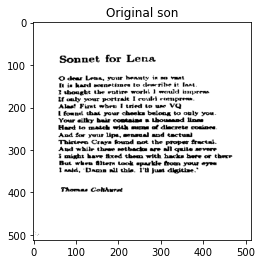

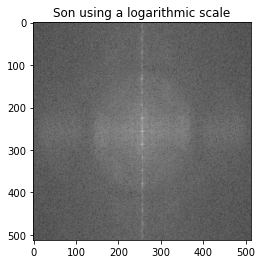

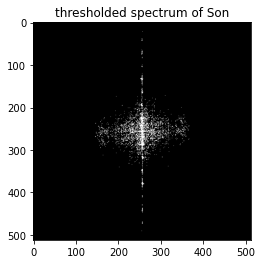

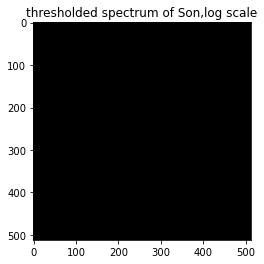

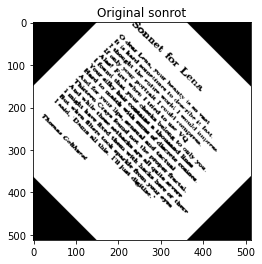

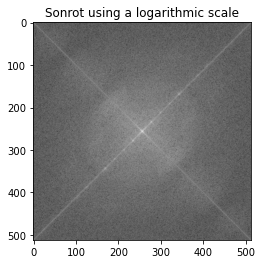

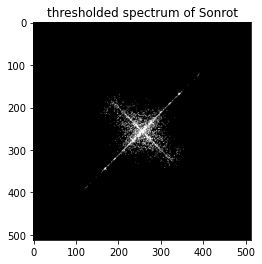

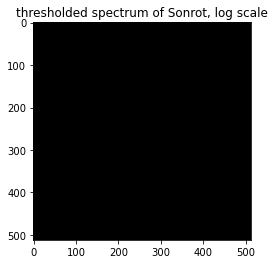

In [30]:
import matplotlib.pyplot as plt
#compute the Fourier transform of son and sonrot
fft_son = computeFT(son)
fft_sonrot = computeFT(sonrot)

#compute the module using a logarithmic scale
log_son = toVisualizeLogFT(fft_son)
log_sonrot = toVisualizeLogFT(fft_sonrot)


#threshold the module with a parameter of  1.10^5
def thresholdImage(I,s):
    """ Array*int -> Array """
    I2 = I.copy()
    I2[I2 < s] = 0
    I2[I2 != 0] = 255
    return I2

thr_son = thresholdImage(toVisualizeFT(fft_son),10**5)
thr_sonrot = thresholdImage(toVisualizeFT(fft_sonrot),10**5)

thr_sonLog = thresholdImage(log_son,10**5)
thr_sonrotLog = thresholdImage(log_sonrot,10**5)

#display son
plt.title("Original son")
plt.imshow(son,cmap="gray")
plt.show()

plt.title("Son using a logarithmic scale")
plt.imshow(log_son,cmap="gray")
plt.show()

plt.title("thresholded spectrum of Son")
plt.imshow(thr_son,cmap="gray")
plt.show()

plt.title("thresholded spectrum of Son,log scale")
plt.imshow(thr_sonLog,cmap="gray")
plt.show()

#display sonrot
plt.title("Original sonrot")
plt.imshow(sonrot,cmap="gray")
plt.show()

plt.title("Sonrot using a logarithmic scale")
plt.imshow(log_sonrot,cmap="gray")
plt.show()

plt.title("thresholded spectrum of Sonrot")
plt.imshow(thr_sonrot,cmap="gray")
plt.show()

plt.title("thresholded spectrum of Sonrot, log scale")
plt.imshow(thr_sonrotLog,cmap="gray")
plt.show()


3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [17]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1 + (1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

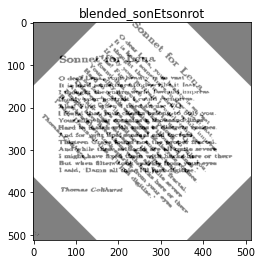

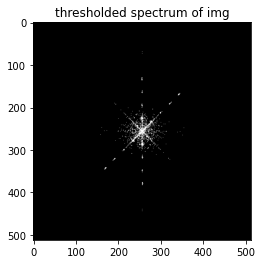

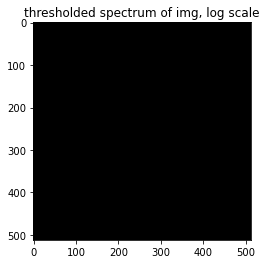

In [33]:
a = 0.5
blended_sonEtsonrot = blend(son, sonrot, a)
plt.title("blended_sonEtsonrot")
plt.imshow(blended_sonEtsonrot,cmap="gray")
plt.show()

fft_img = computeFT(blended_img)
log_img = toVisualizeLogFT(fft_img)
thr_img = thresholdImage(toVisualizeFT(fft_img), 10**5)
thr_imgLog = thresholdImage(log_img, 10**5)
#display
plt.title("thresholded spectrum of img")
plt.imshow(thr_img,cmap = "gray")
plt.show()

plt.title("thresholded spectrum of img, log scale")
plt.imshow(thr_imgLog,cmap = "gray")
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [ ]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below



8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  